In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import math

In [2]:
data = pd.read_csv("../dados/train.csv")
test = pd.read_csv("../dados/test.csv")

In [3]:
print("Tamanho do data: {}".format(len(data.columns)))
print("Tamanho do test: {}".format(len(test.columns)))

Tamanho do data: 81
Tamanho do test: 80


In [4]:
print("Quantidade de atributos: {}".format(data.shape))
print("Quantidade de atributos númericos: {}".format(len(data.select_dtypes(exclude=["object"]).columns)))
print("Quantidade de atributos categóricos: {}".format(len(data.select_dtypes(include=["object"]).columns)))

Quantidade de atributos: (1460, 81)
Quantidade de atributos númericos: 38
Quantidade de atributos categóricos: 43


### Analisando os dados numéricos

In [5]:
data.select_dtypes(exclude=["object"]).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [5]:
data['MSSubClass'].describe()

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

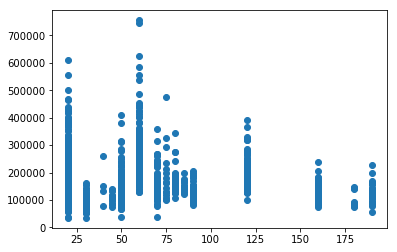

In [6]:
plt.scatter(data['MSSubClass'], data['SalePrice'])

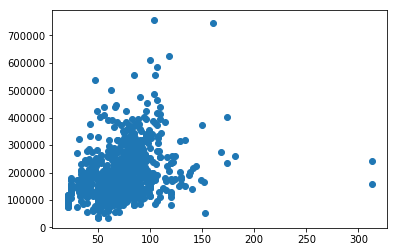

In [7]:
plt.scatter(data['LotFrontage'], data['SalePrice']) # é bem desperço

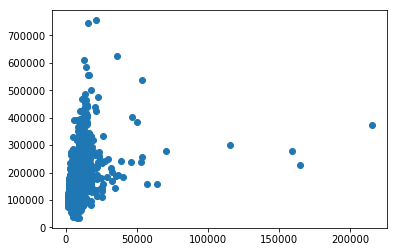

In [8]:
plt.scatter(data['LotArea'], data['SalePrice']) # parece ser polimonial

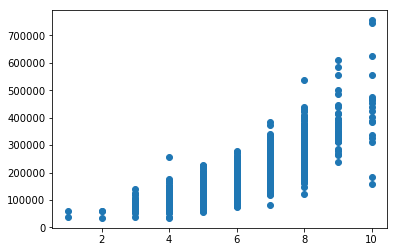

In [9]:
plt.scatter(data['OverallQual'], data['SalePrice']) # parece ser algo linear

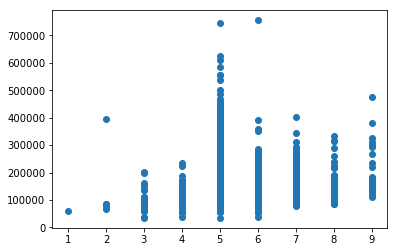

In [10]:
plt.scatter(data['OverallCond'], data['SalePrice']) # parece uma gaussiana, porém com uma lado maior

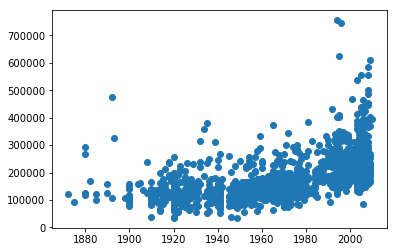

In [11]:
plt.scatter(data['YearBuilt'], data['SalePrice']) # 

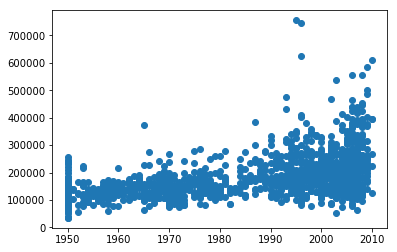

In [12]:
plt.scatter(data['YearRemodAdd'], data['SalePrice']) # não apresenta uma grande

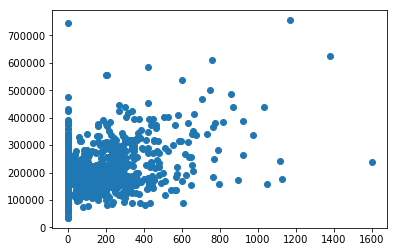

In [13]:
plt.scatter(data['MasVnrArea'], data['SalePrice']) # não apresenta correlação

In [14]:
data['BsmtFinSF1'].describe()

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

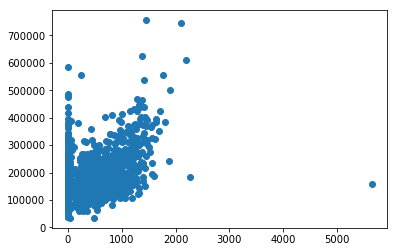

In [15]:
plt.scatter(data['BsmtFinSF1'], data['SalePrice'])

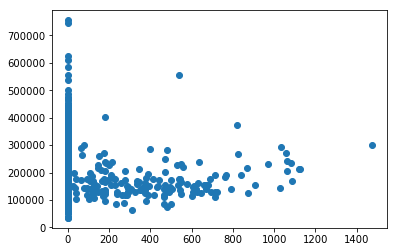

In [16]:
plt.scatter(data['BsmtFinSF2'], data['SalePrice'])

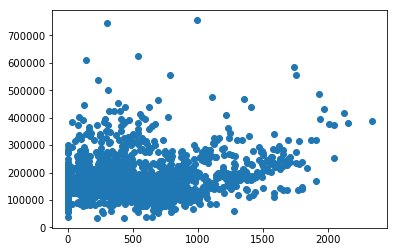

In [17]:
plt.scatter(data['BsmtUnfSF'], data['SalePrice'])

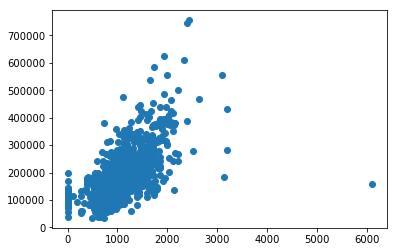

In [18]:
plt.scatter(data['TotalBsmtSF'], data['SalePrice'])

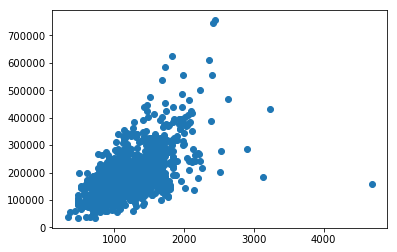

In [19]:
plt.scatter(data['1stFlrSF'], data['SalePrice'])

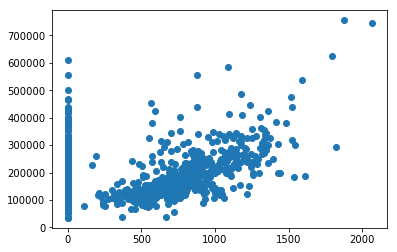

In [20]:
plt.scatter(data['2ndFlrSF'], data['SalePrice'])

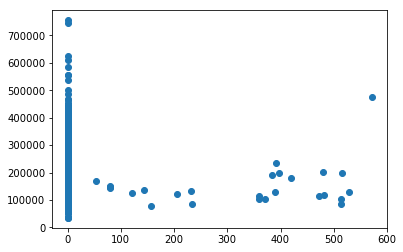

In [21]:
plt.scatter(data['LowQualFinSF'], data['SalePrice'])

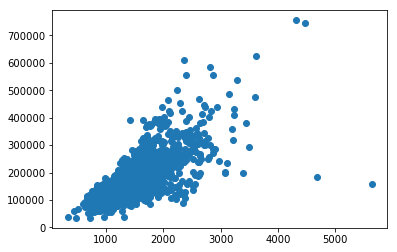

In [22]:
plt.scatter(data['GrLivArea'], data['SalePrice']) # bastante correlacionado

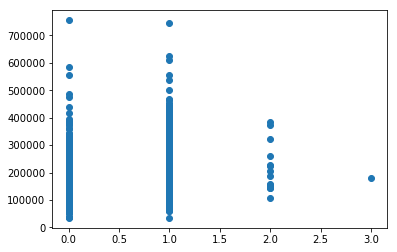

In [23]:
plt.scatter(data['BsmtFullBath'], data['SalePrice'])

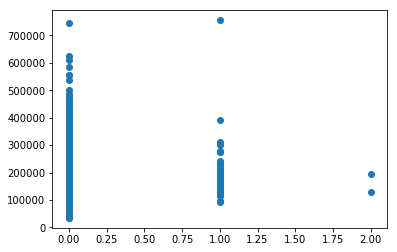

In [24]:
plt.scatter(data['BsmtHalfBath'], data['SalePrice'])

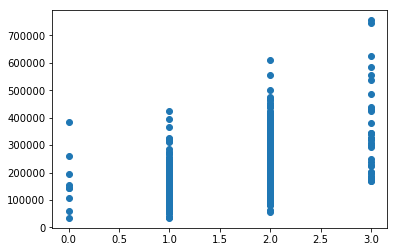

In [25]:
plt.scatter(data['FullBath'], data['SalePrice'])

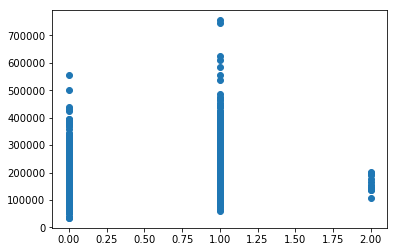

In [26]:
plt.scatter(data['HalfBath'], data["SalePrice"])

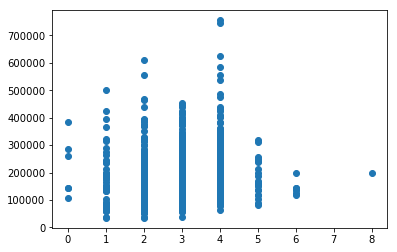

In [27]:
plt.scatter(data['BedroomAbvGr'], data['SalePrice']) # este item não está na descriçao do kaggle

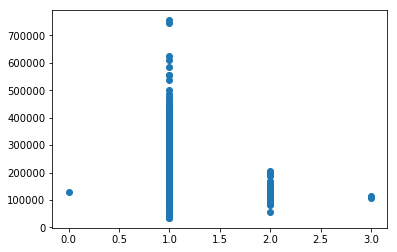

In [28]:
plt.scatter(data['KitchenAbvGr'], data['SalePrice']) # este item não está na descriçao do kaggle

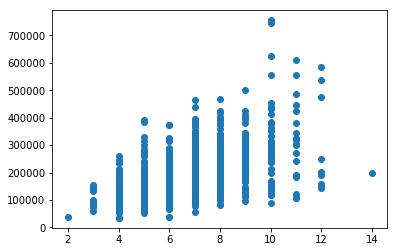

In [29]:
plt.scatter(data['TotRmsAbvGrd'], data['SalePrice'])

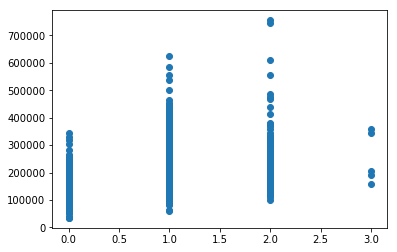

In [30]:
plt.scatter(data['Fireplaces'], data['SalePrice'])

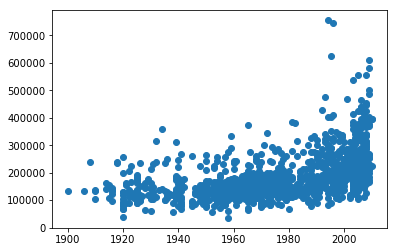

In [31]:
plt.scatter(data['GarageYrBlt'], data['SalePrice'])

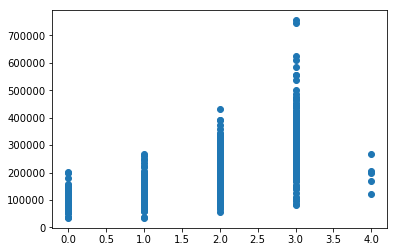

In [32]:
plt.scatter(data['GarageCars'], data['SalePrice'])

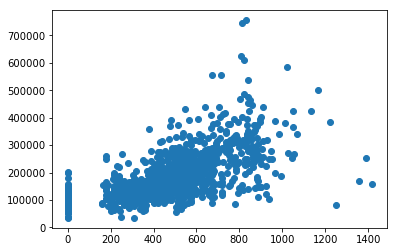

In [33]:
plt.scatter(data['GarageArea'], data['SalePrice'])

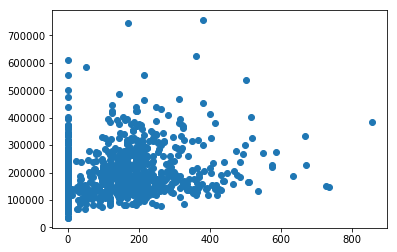

In [34]:
plt.scatter(data['WoodDeckSF'], data["SalePrice"])

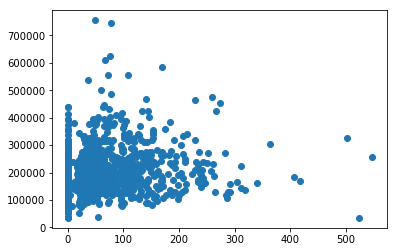

In [35]:
plt.scatter(data['OpenPorchSF'], data['SalePrice'])

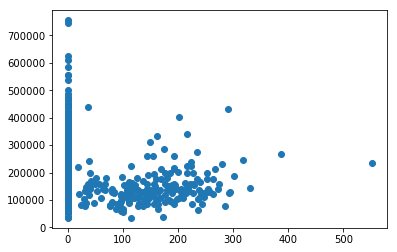

In [36]:
plt.scatter(data['EnclosedPorch'], data['SalePrice'])

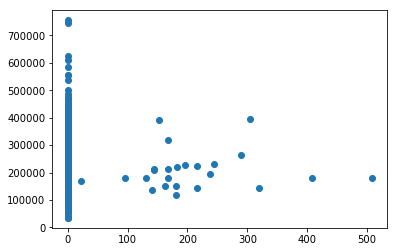

In [37]:
plt.scatter(data['3SsnPorch'], data['SalePrice'])

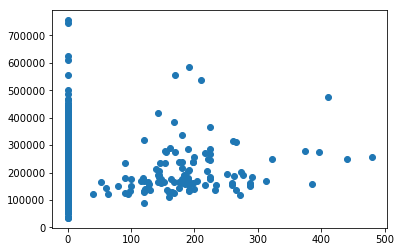

In [38]:
plt.scatter(data['ScreenPorch'], data['SalePrice'])

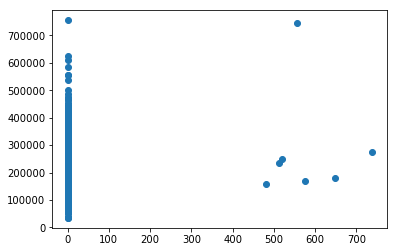

In [39]:
plt.scatter(data['PoolArea'], data['SalePrice'])

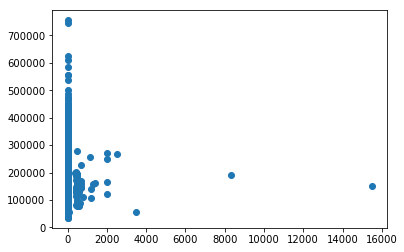

In [40]:
plt.scatter(data['MiscVal'], data["SalePrice"]) # não tem forte correlação

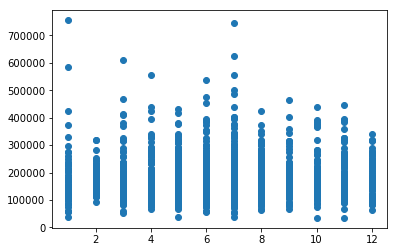

In [41]:
plt.scatter(data['MoSold'], data['SalePrice']) # não tem forte correlação

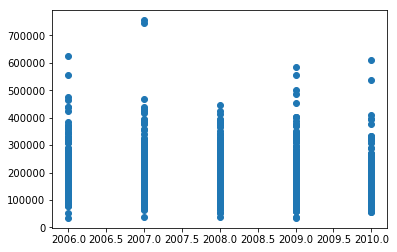

In [42]:
plt.scatter(data['YrSold'], data['SalePrice']) # não tem forte correlacão

### Analisando os dados categoricos

In [6]:
data.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [5]:
def print_descricao(coluna):
    print('\n')
    print('*****{}*****'.format('*' * len(coluna)))
    print('**** {} ****'.format(coluna))
    print('*****{}*****'.format('*' * len(coluna)))
    print('\n')
    print('---- Describe values ----')
    print(data[coluna].describe())
    print('\n')
    print('---- Select Unique Values ----')
    print(data[coluna].unique())
    print('\n')
    print('---- Count Values ----')
    print(data[coluna].value_counts())

In [48]:
def print_todas_descricao(colunas):
    for coluna in colunas:
        print_descricao(coluna)

In [49]:
print_todas_descricao(data.select_dtypes(include=['object']).columns) # apenas para categóricos



******************
**** MSZoning ****
******************


---- Describe values ----
count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object


---- Select Unique Values ----
['RL' 'RM' 'C (all)' 'FV' 'RH']


---- Count Values ----
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


****************
**** Street ****
****************


---- Describe values ----
count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object


---- Select Unique Values ----
['Pave' 'Grvl']


---- Count Values ----
Pave    1454
Grvl       6
Name: Street, dtype: int64


***************
**** Alley ****
***************


---- Describe values ----
count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object


---- Select Unique Values ----
[nan 'Grvl' 'Pave']


---- Count Values ----
Grvl    50
Pave    41
Name: Alley, dtype: int64


******************
**** LotShape **

---- Count Values ----
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


*********************
**** FireplaceQu ****
*********************


---- Describe values ----
count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object


---- Select Unique Values ----
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


---- Count Values ----
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


********************
**** GarageType ****
********************


---- Describe values ----
count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object


---- Select Unique Values ----
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']


---- Count Values ----
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


**********************
**** GarageFinish ****
****************

In [50]:
for coluna in data:
    print(coluna)
    print("Quantidade de elementos não nulos: {} \n".format(data[coluna].count()))

Id
Quantidade de elementos não nulos: 1460 

MSSubClass
Quantidade de elementos não nulos: 1460 

MSZoning
Quantidade de elementos não nulos: 1460 

LotFrontage
Quantidade de elementos não nulos: 1201 

LotArea
Quantidade de elementos não nulos: 1460 

Street
Quantidade de elementos não nulos: 1460 

Alley
Quantidade de elementos não nulos: 91 

LotShape
Quantidade de elementos não nulos: 1460 

LandContour
Quantidade de elementos não nulos: 1460 

Utilities
Quantidade de elementos não nulos: 1460 

LotConfig
Quantidade de elementos não nulos: 1460 

LandSlope
Quantidade de elementos não nulos: 1460 

Neighborhood
Quantidade de elementos não nulos: 1460 

Condition1
Quantidade de elementos não nulos: 1460 

Condition2
Quantidade de elementos não nulos: 1460 

BldgType
Quantidade de elementos não nulos: 1460 

HouseStyle
Quantidade de elementos não nulos: 1460 

OverallQual
Quantidade de elementos não nulos: 1460 

OverallCond
Quantidade de elementos não nulos: 1460 

YearBuilt
Quantida

In [55]:
data.select_dtypes(exclude=['object']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

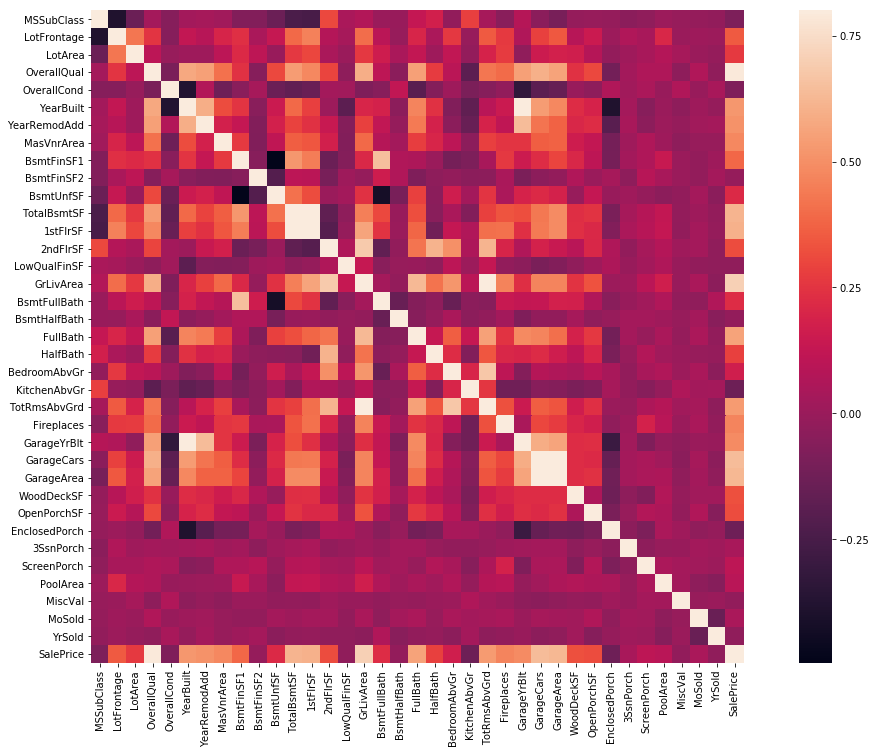

In [256]:
new = data[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']].copy()

corrmat = new.corr()
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corrmat, vmax=.8, square=True);


### Pegar todas que são pelo menos 0.25 de correlação nos valores numéricos
- OverallQual
- YearBuilt
- YearRemodAdd
- MasVnrArea
- 1stFlrSF
- GrLivArea
- FullBath
- TotRmsAbvGrd
- Fireplaces
- GarageYrBlt
- GarageCars
- GarageArea

#### Falta escolher os numéricos

- LotShape
- Neighborhood (pode gerar muitas dimensões)
- HouseStyle
- Exterior1st (pode gerar muitas dimensões)
- Exterior2nd (pode gerar muitas dimensões)
- MasVnrType
- ExterQual
- Foundation
- BsmtQual
- BsmtExposure
- BsmtFinType1
- HeatingQC
- KitchenQual
- FireplaceQu
- GarageType
- GarageFinish

In [51]:
data['PoolQC'].describe() # talvez seja útil transformar este em uma feature has_pool

count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object

In [91]:
def preprocessar(df):
    new_df = pd.DataFrame()
    # dados numericos
#     new_df['OverallQual'] = df['OverallQual']
#     new_df['YearBuilt'] = df['YearBuilt']
#     new_df['YearRemodAdd'] = df['YearRemodAdd']
#     new_df['MasVnrArea'] = df['MasVnrArea']
#     new_df['1stFlrSF'] = df['1stFlrSF']
#     new_df['FullBath'] = df['FullBath']
#     new_df['TotRmsAbvGrd'] = df['TotRmsAbvGrd']
#     new_df['Fireplaces'] = df['Fireplaces'] 
#     new_df['GarageYrBlt'] = df['GarageYrBlt']
#     new_df['GarageCars'] = df['GarageCars']

 # OveraallQual, GrliveArea, YearBuilt, GarageArea,
# GarageCars, TotalBsmtSF, 1stFlrSF
    new_df['OverallQual'] = df['OverallQual']
    new_df['GrLivArea'] = df['GrLivArea']
    new_df['YearBuilt'] = df['YearBuilt']
    new_df['GarageArea'] = df['GarageArea']
    new_df['GarageCars'] = df['GarageCars']
    new_df['TotalBsmtSF'] = df['TotalBsmtSF']
    new_df['1stFlrSF'] = df['1stFlrSF']

    
    # dados categoricos discretizados
    
#     HouseStyle = pd.get_dummies(df['HouseStyle'], prefix='HouseStyle')
#     for c in HouseStyle:
#         new_df[c] = HouseStyle[c]
    
    MasVnrType = pd.get_dummies(df['MasVnrType'], prefix='MasVnrType')
    for c in MasVnrType:
        new_df[c] = MasVnrType[c]
    
    LotShape = pd.get_dummies(df['LotShape'], prefix='LotShape')
    for c in LotShape:
        new_df[c] = LotShape[c]
        
#     ExterQual = pd.get_dummies(df['ExterQual'], prefix='ExterQual')
#     for c in ExterQual:
#         new_df[c] = ExterQual[c]
    
    Foundation = pd.get_dummies(df['Foundation'], prefix='Foundation')
    for c in Foundation:
        new_df[c] = Foundation[c]
    
#     BsmtQual = pd.get_dummies(df['BsmtQual'], prefix='BsmtQual')
#     for c in BsmtQual:
#         new_df[c] = BsmtQual[c]
    

#     BsmtFinType1 = pd.get_dummies(df['BsmtFinType1'], prefix='BsmtFinType1')
#     for c in BsmtFinType1:
#         new_df[c] = BsmtFinType1[c]
    
    HeatingQC = pd.get_dummies(df['HeatingQC'], prefix='HeatingQC')
    for c in HeatingQC:
        new_df[c] = HeatingQC[c]
    
    KitchenQual = pd.get_dummies(df['KitchenQual'], prefix='KitchenQual')
    for c in KitchenQual:
        new_df[c] = KitchenQual[c]
    
#     FireplaceQu = pd.get_dummies(df['FireplaceQu'], prefix='FireplaceQu')
#     for c in FireplaceQu:
#         new_df[c] = FireplaceQu[c]
    
#     GarageType = pd.get_dummies(df['GarageType'], prefix='GarageType')
#     for c in GarageType:
#         new_df[c] = GarageType[c]
    
#     GarageFinish = pd.get_dummies(df['GarageFinish'], prefix='GarageFinish')
#     for c in GarageFinish:
#         new_df[c] = GarageFinish[c]
#     # categorias com mais de 1200 nulos são automaticamente descartadas
    return new_df

In [92]:
train = preprocessar(data)

In [93]:
print(len(train.columns))
print(len(data.columns))

30
81


In [94]:
def euclidiana(dado1, dado2):
    cont = 0
    for x in dado1.index:
         cont += (dado1[x] - dado2[x]) ** 2
    return math.sqrt(cont)

In [99]:
euclidiana(train.iloc[0], train.iloc[0])

0.0

In [100]:
def calcular_distancia(dados, elemento):
    lista = list()
    for x in range(len(dados)):
        lista.append((x,euclidiana(dados.iloc[x], elemento)))
    return lista

In [101]:
lista = calcular_distancia(train, train.iloc[0])

In [102]:
print(lista[1]) #734.0681167303209

(1, 734.0681167303209)


In [103]:
def knn(dados_preprocessados, data, novo, k):
    #encontrar a distância de todos para o novo
    lista = calcular_distancia(dados_preprocessados, novo)
    
    #pegar n elementos mais perto do novo
    k_menores_distancias = sorted(range(len(lista)), key=lambda i: lista[i][1])[:k]
    menores = []
    for x in range(len(lista)):
        if lista[x][0] in k_menores_distancias:
            menores.append(lista[x])
    
    cont = 0
    for x in range(k):
        cont += data.iloc[menores[x][0]]['SalePrice']
    return cont/k
    #retornar a médias dos n elementos
    
knn(train, data, train.iloc[0], 3)

198333.33333333334

In [104]:
def gerar_para_todos(dados, teste, k):
    submissao = pd.DataFrame()
    submissao['Id'] = teste['Id']
    submissao['SalePrice'] = 0
    test = preprocessar(teste)
    data = preprocessar(dados)
    
    cont = 1
    
    for x in range(len(teste)):
        salePrice = knn(data, dados, test.iloc[x], k)
        print(salePrice)
        submissao.at[x, 'SalePrice'] = salePrice
        print(submissao.iloc[x]['SalePrice'])
        print(cont/len(teste))
        cont += 1
        print('---')
    return submissao

In [107]:
sub = gerar_para_todos(data, test, 5)

124900.0
124900
0.0006854009595613434
---
159876.8
159876
0.0013708019191226869
---
178700.0
178700
0.00205620287868403
---
178700.0
178700
0.0027416038382453737
---
202940.0
202940
0.003427004797806717
---
171180.0
171180
0.00411240575736806
---
163240.0
163240
0.004797806716929404
---
180620.0
180620
0.0054832076764907475
---
188400.0
188400
0.00616860863605209
---
123980.0
123980
0.006854009595613434
---
209686.0
209686
0.0075394105551747775
---
95180.0
95180
0.00822481151473612
---
83900.0
83900
0.008910212474297465
---
161000.0
161000
0.009595613433858808
---
120580.0
120580
0.01028101439342015
---
382114.8
382114
0.010966415352981495
---
243103.6
243103
0.011651816312542838
---
289770.0
289770
0.01233721727210418
---
288500.0
288500
0.013022618231665525
---
459481.4
459481
0.013708019191226868
---
382114.8
382114
0.01439342015078821
---
200103.0
200103
0.015078821110349555
---
177607.6
177607
0.015764222069910898
---
154740.0
154740
0.01644962302947224
---
169200.0
169200
0.01713

300800.0
300800
0.14119259766963674
---
308000.0
308000
0.1418779986291981
---
293826.0
293826
0.14256339958875944
---
231526.2
231526
0.14324880054832076
---
285662.6
285662
0.1439342015078821
---
215280.0
215280
0.14461960246744346
---
448848.8
448848
0.1453050034270048
---
287622.6
287622
0.14599040438656613
---
251058.6
251058
0.14667580534612748
---
204403.0
204403
0.14736120630568883
---
203025.8
203025
0.14804660726525018
---
205683.0
205683
0.1487320082248115
---
448848.8
448848
0.14941740918437285
---
267419.6
267419
0.1501028101439342
---
305797.4
305797
0.15078821110349555
---
203200.0
203200
0.1514736120630569
---
286600.0
286600
0.15215901302261822
---
183050.0
183050
0.15284441398217957
---
176706.0
176706
0.15352981494174092
---
176506.0
176506
0.15421521590130227
---
170400.0
170400
0.1549006168608636
---
169200.0
169200
0.15558601782042494
---
183600.0
183600
0.1562714187799863
---
174400.0
174400
0.15695681973954764
---
180620.0
180620
0.157642220699109
---
160680.0
1

137550.0
137550
0.2837559972583962
---
189580.0
189580
0.2844413982179575
---
196800.0
196800
0.2851267991775189
---
232556.0
232556
0.2858122001370802
---
217626.4
217626
0.2864976010966415
---
128941.6
128941
0.2871830020562029
---
128480.0
128480
0.2878684030157642
---
274824.4
274824
0.28855380397532554
---
204460.0
204460
0.2892392049348869
---
194000.0
194000
0.28992460589444824
---
223635.6
223635
0.2906100068540096
---
225380.0
225380
0.29129540781357094
---
219267.4
219267
0.29198080877313226
---
185950.0
185950
0.29266620973269364
---
242643.6
242643
0.29335161069225496
---
145266.4
145266
0.29403701165181634
---
154000.0
154000
0.29472241261137766
---
127998.6
127998
0.295407813570939
---
127400.0
127400
0.29609321453050036
---
155180.0
155180
0.2967786154900617
---
158800.0
158800
0.297464016449623
---
153200.0
153200
0.2981494174091844
---
127400.0
127400
0.2988348183687457
---
121300.0
121300
0.2995202193283071
---
92500.0
92500
0.3002056202878684
---
152700.0
152700
0.30

168600.0
168600
0.4270047978067169
---
107756.6
107756
0.4276901987662783
---
140160.0
140160
0.4283755997258396
---
96420.0
96420
0.429061000685401
---
127480.0
127480
0.4297464016449623
---
147585.0
147585
0.43043180260452363
---
94600.0
94600
0.431117203564085
---
146465.0
146465
0.4318026045236463
---
123980.0
123980
0.43248800548320765
---
172800.0
172800
0.433173406442769
---
174200.0
174200
0.43385880740233035
---
106520.0
106520
0.4345442083618917
---
166660.0
166660
0.43522960932145305
---
90000.0
90000
0.43591501028101437
---
96100.0
96100
0.43660041124057575
---
170380.0
170380
0.43728581220013707
---
66562.2
66562
0.43797121315969845
---
115880.0
115880
0.43865661411925977
---
155660.0
155660
0.4393420150788211
---
143470.0
143470
0.44002741603838247
---
104800.0
104800
0.4407128169979438
---
218080.0
218080
0.44139821795750517
---
126100.0
126100
0.4420836189170665
---
104860.0
104860
0.4427690198766278
---
234080.0
234080
0.4434544208361892
---
137680.0
137680
0.444139821

447517.4
447517
0.5716244002741604
---
461548.8
461548
0.5723098012337218
---
299982.0
299982
0.572995202193283
---
270850.0
270850
0.5736806031528444
---
285662.6
285662
0.5743660041124058
---
489217.4
489217
0.5750514050719671
---
317610.0
317610
0.5757368060315284
---
224807.6
224807
0.5764222069910898
---
267498.6
267498
0.5771076079506511
---
222860.0
222860
0.5777930089102125
---
224459.8
224459
0.5784784098697738
---
203025.8
203025
0.5791638108293352
---
203025.8
203025
0.5798492117888965
---
198923.0
198923
0.5805346127484579
---
242812.2
242812
0.5812200137080192
---
219940.0
219940
0.5819054146675805
---
212191.2
212191
0.5825908156271419
---
183050.0
183050
0.5832762165867033
---
189220.0
189220
0.5839616175462645
---
178540.0
178540
0.5846470185058259
---
165999.4
165999
0.5853324194653873
---
170447.0
170447
0.5860178204249485
---
174708.0
174708
0.5867032213845099
---
179251.0
179251
0.5873886223440713
---
174280.0
174280
0.5880740233036327
---
176706.0
176706
0.58875942

261780.0
261780
0.7169294037011652
---
374939.6
374939
0.7176148046607266
---
261780.0
261780
0.7183002056202878
---
231480.0
231480
0.7189856065798492
---
217014.0
217014
0.7196710075394106
---
187940.0
187940
0.7203564084989719
---
211495.0
211495
0.7210418094585332
---
223635.6
223635
0.7217272104180946
---
197500.0
197500
0.7224126113776559
---
142430.0
142430
0.7230980123372173
---
150140.0
150140
0.7237834132967786
---
125830.0
125830
0.7244688142563399
---
136465.0
136465
0.7251542152159013
---
233500.0
233500
0.7258396161754627
---
203560.0
203560
0.726525017135024
---
186680.0
186680
0.7272104180945853
---
201080.0
201080
0.7278958190541467
---
124780.0
124780
0.7285812200137081
---
123380.0
123380
0.7292666209732693
---
143650.0
143650
0.7299520219328307
---
137450.0
137450
0.7306374228923921
---
123240.0
123240
0.7313228238519534
---
127700.0
127700
0.7320082248115147
---
115730.0
115730
0.7326936257710761
---
100778.6
100778
0.7333790267306374
---
222330.0
222330
0.73406442

220940.0
220940
0.86223440712817
---
161480.0
161480
0.8629198080877313
---
174680.0
174680
0.8636052090472927
---
148500.0
148500
0.864290610006854
---
205935.0
205935
0.8649760109664153
---
124200.0
124200
0.8656614119259767
---
129700.0
129700
0.866346812885538
---
136680.0
136680
0.8670322138450994
---
152400.0
152400
0.8677176148046607
---
153200.0
153200
0.8684030157642221
---
146580.0
146580
0.8690884167237835
---
163080.0
163080
0.8697738176833447
---
151170.0
151170
0.8704592186429061
---
114800.0
114800
0.8711446196024675
---
116800.0
116800
0.8718300205620287
---
178648.0
178648
0.8725154215215901
---
185700.0
185700
0.8732008224811515
---
141800.0
141800
0.8738862234407128
---
157677.4
157677
0.8745716244002741
---
122650.0
122650
0.8752570253598355
---
208040.0
208040
0.8759424263193969
---
167848.0
167848
0.8766278272789582
---
146700.0
146700
0.8773132282385195
---
141100.0
141100
0.8779986291980809
---
148300.0
148300
0.8786840301576422
---
155180.0
155180
0.87936943111

In [108]:
sub

,Id,SalePrice
0,1461,124900
1,1462,159876
2,1463,178700
3,1464,178700
4,1465,202940
5,1466,171180
6,1467,163240
7,1468,180620
8,1469,188400
9,1470,123980


In [109]:
sub.to_csv('kaggle.csv', index=False)